# **Kütüphaneleri Yükle:**

* **numpy (np):** Sayısal hesaplamalar için optimize edilmiş veri yapıları ve fonksiyonlar sağlar.

* **pandas (pd):** Veri analizi için tasarlanmış yüksek seviyeli veri yapıları ve araçlar sunar.

* **matplotlib.pyplot (plt):** Veri görselleştirme işlemleri için kullanılır.

*Bu kütüphanelerin içe aktarılması, projenin temelini oluşturur.*

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Verileri Yükle ve Göster:**

Bu kod bloğu, aşağıdakileri gerçekleştirir:

1. "**/Kidem_ve_Maas_VeriSeti.csv**" dosyasından
veriyi Pandas DataFrame'ine yükler.

2. Yüklenen veri setinin ilk 5 satırını gösterir.

Bu, veri setinin içeriğini ve yapısını hızlı bir şekilde incelememizi sağlar.

In [6]:
data = pd.read_csv("Kidem_ve_Maas_VeriSeti.csv")
data.head()

,Kidem,Maas
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **Verileri X ve Y Özelliklerine Dönüştür:**

Bu kod bloğu, aşağıdakileri gerçekleştirir:

1. data Pandas DataFrame'inden iki özellik seçer:

* x: İlk sütun (kidem)

* y: İkinci sütun (maaş)
2. Seçilen özellikleri NumPy dizilerine dönüştürür.

3. Her bir özelliği tek sütunlu bir matrise dönüştürmek için '**reshape(-1, 1)**' fonksiyonunu kullanır.

In [7]:
x = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)

# **Verileri Görselleştir:**

Bu kod bloğu, aşağıdakileri gerçekleştirir:

1. x ve y özelliklerini bir dağılım grafiğinde gösterir.

2. x eksenini **"tecrübe"** olarak adlandırır.

3. y eksenini **"maaş"** olarak adlandırır.
Grafiği gösterir.

*Bu, veri setindeki ilişkiyi görsel olarak incelememizi sağlar.*

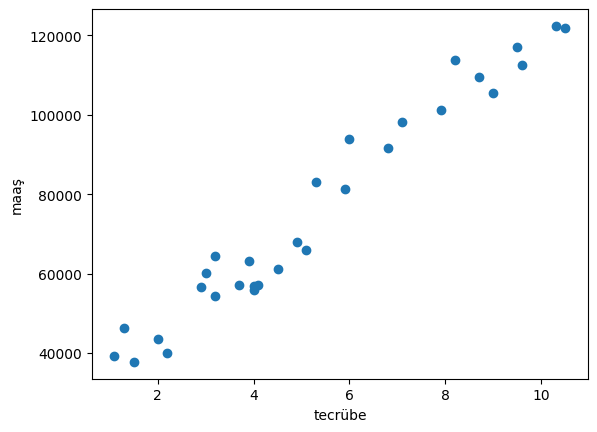

In [8]:
plt.scatter(x,y)
plt.xlabel("tecrübe")
plt.ylabel("maaş")
plt.show()

# **Verileri Eğitim ve Test Setlerine Ayır:**

Bu kod bloğu, aşağıdakileri gerçekleştirir:

1. **train_test_split** fonksiyonunu kullanarak veriyi %70 eğitim ve %30 test setlerine ayırır.

2. **xtrain** ve **ytrain** değişkenleri eğitim setini, **xtest** ve **ytest** değişkenleri ise test setini temsil eder.

3. **random_state=33** parametresi, veri bölme işleminin tekrarlanabilir olmasını sağlar.

*Bu, modelin genelleme performansını daha iyi değerlendirmemizi sağlar.*

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=33)

# **Doğrusal Regresyon Modeli Oluştur:**

* Bu kod bloğu, **LinearRegression** sınıfından bir nesne oluşturarak doğrusal regresyon modeli oluşturur.

* **lr** değişkeni, oluşturulan modeli temsil eder.

*Bu, veri setindeki ilişkiyi modellemek için kullanılacak modeli oluşturur.*

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# **Doğrusal Regresyon Modelini Eğit:**

* Bu kod bloğu, **lr** modelini **xtrain** ve **ytrain** eğitim verileriyle eğitir.

*Bu işlem, modelin parametrelerini optimize eder ve veri setindeki ilişkiyi öğrenmesini sağlar.*

In [11]:
lr.fit(xtrain,ytrain)

LinearRegression()

# **Test Verileri için Tahminleri Hesapla:**

* Bu kod bloğu, **lr** modelini kullanarak **xtest** test verisi için maaş tahminleri hesaplar.

* **yhead** değişkeni, test verisi için tahmin edilen maaşları içerir.

*Bu, modelin test verisi üzerindeki performansını değerlendirmemizi sağlar.*

In [12]:
yhead = lr.predict(xtest)

In [13]:
lr.predict([[3.5]])

array([[58805.19722914]])

# **Verileri ve Tahminleri Görselleştir:**

Bu kod bloğu, aşağıdakileri gerçekleştirir:

* **x** ve **y** özelliklerini bir dağılım grafiğinde gösterir.

* Kırmızı renkte bir çizgi kullanarak **xtest** test verisi için **yhead** tahminlerini gösterir.

*Bu, modelin test verisi üzerindeki performansını görsel olarak incelememizi sağlar.*

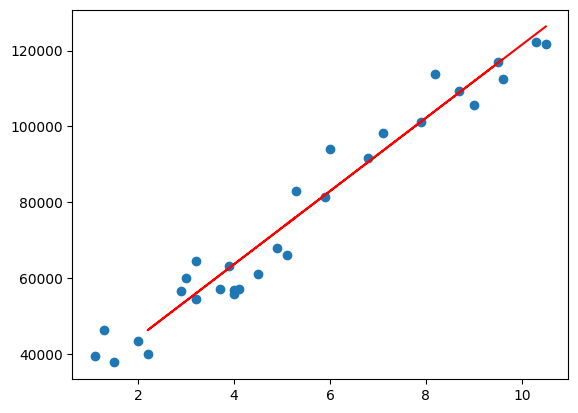

In [14]:
plt.scatter(x,y)
plt.plot(xtest, yhead, color="red")